In [55]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import ttest_rel

In [59]:
calc = pd.read_csv('calc_cancer.ssv', sep='\t')
calc.rename(columns={'Unnamed: 6': 'Original', 'Unnamed: 11': 'Cropped'}, inplace=True)
calc = calc[['Original', 'Cropped']]
calc = calc.iloc[1:]
calc["Original"] = calc["Original"].astype(float)
calc["Cropped"] = calc["Cropped"].astype(float)
calc["type"] = "Calcification"
tat, p_val = ttest_rel(calc["Original"], calc["Cropped"], alternative='less')
p_val

np.float64(0.0026201411477999735)

In [60]:
other = pd.read_csv('other_features.ssv', sep='\t')
other.rename(columns={'prediction': 'Original', 'Maximum': 'Cropped'}, inplace=True)
other = other[['Original', 'Cropped']]
other["Original"] = other["Original"].astype(float)
other["Cropped"] = other["Cropped"].astype(float)
other["type"] = "Other Feature"
tat, p_val = ttest_rel(other["Original"], other["Cropped"], alternative='less')
p_val

np.float64(0.7992047581557142)

In [62]:
normal = pd.read_csv('normal.ssv', sep='\t')
normal.rename(columns={'prediction': 'Original', 'MAX': 'Cropped'}, inplace=True)
normal = normal[['Original', 'Cropped']]
normal["Original"] = normal["Original"].astype(float)
normal["Cropped"] = normal["Cropped"].astype(float)
normal["type"] = "Normal"
tat, p_val = ttest_rel(normal["Original"], normal["Cropped"], alternative='less')
p_val

np.float64(0.5545406368185029)

In [63]:
columns_to_plot = ['Original', 'Cropped']
df = pd.concat([calc, other, normal], ignore_index=True)
df = pd.melt(df, id_vars=['type'], value_vars=columns_to_plot)


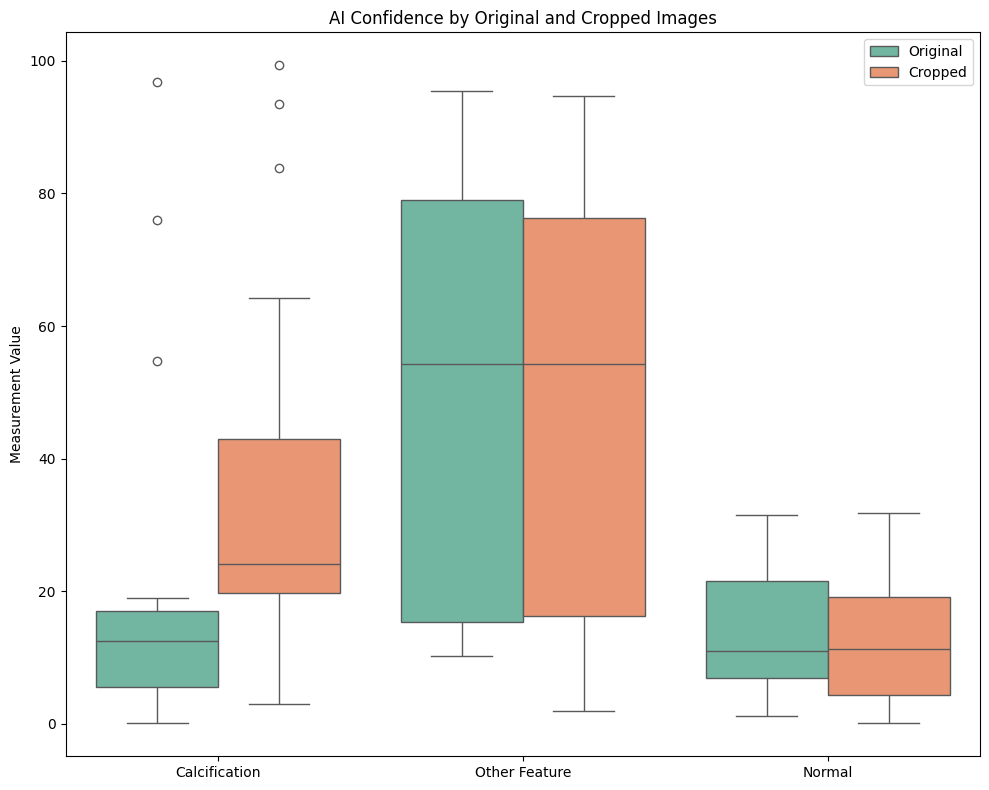

In [ ]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=df, x='type', y='value', hue='variable', palette='Set2')
plt.title('AI Confidence by Original and Cropped Images')
plt.ylabel('AI Confidence')
plt.xlabel('')
plt.legend(title='')
plt.tight_layout()